In [42]:
import pyautogui as p
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from screenshot import _screenshot_win32 as scr

In [43]:
x_screen=[1041,1160,1180,1296,1315,1431,1452,1568]
y_screen = [337,451,472,590,610,726,745,863]

In [44]:
x_screen=[1093,1192,1203,1299,1315,1408,1421,1518]
y_screen = [388,486,499,597,608,703,717,812]

In [45]:
p.position()

(409, 375)

In [46]:
def get_tiles(img):
    tiles= []
    for i in range(4):
        for j in range(4):
            x = img.copy()
            #x = x.crop((x_screen[i*2],y_screen[j*2],x_screen[i*2+1],y_screen[j*2+1]))
            #x.show()
            x= x.crop((x_screen[i*2],y_screen[j*2],x_screen[i*2+1],y_screen[j*2+1]))
            #x.show()
            x = x.convert('L')
            x = x.resize((60,60))
            tiles.append(np.abs(np.asarray(x,dtype='int32')-255).copy())
    return tiles 
tiles = get_tiles(img)

In [47]:

# coding: utf-8

# In[1]:

import numpy as np
import pandas as pd


# In[11]:

import os
from PIL import Image


# In[62]:

from keras.models import Model
from keras.layers import Dense,Input,Conv2D,MaxPooling2D,GlobalAveragePooling2D,Activation,Dropout
from keras.losses import binary_crossentropy
from keras.optimizers import Adam,SGD


# In[63]:

def model():
    inputs=l=Input((60,60,1))
    l=Conv2D(32,(3,3),padding="same",name="conv_1")(l)
    l=Activation("relu",name="conv_act_1")(l)
    l=MaxPooling2D((3,3),strides=(2,2),padding="valid",name="conv_pool1")(l)
    
    
    l=Conv2D(64,(3,3),padding="same",name="conv_2")(l)
    l=Activation("relu",name="conv_act_2")(l)
    l=MaxPooling2D((3,3),strides=(2,2),padding="valid",name="conv_pool2")(l)
    
    l=Conv2D(128,(3,3),padding="same",name="conv_3")(l)
    l=Activation("relu",name="conv_act_3")(l)
    l=GlobalAveragePooling2D()(l)
    l=Dropout(0.5)(l)
    
    l=Dense(64,activation="relu",name="d1")(l)
    l=Dense(26,activation="softmax",name="d2")(l)
    outputs=l
    return inputs,outputs
    


# In[68]:

from keras.preprocessing.image import ImageDataGenerator



# In[ ]:

def get_ocr(tiles):
    inputs,outputs=model()
    mod=Model(inputs=inputs,outputs=outputs)
    optim=Adam(1e-4)
    mod.compile(optimizer=optim,loss="categorical_crossentropy",metrics=["accuracy"])
    mod.load_weights("hope_true.h5",by_name=True)
    test=np.asarray(tiles).reshape(-1,60,60,1)
    idg=ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True)
    idg.fit(test)
    
    steps_per_epoch = int(np.ceil(len(test) / 64))
    testing_gen = idg.flow(test,[0]*len(tiles),shuffle=False,batch_size=64)
    pred = mod.predict_generator(testing_gen,steps=1)
    pred = np.argmax(pred,axis=1)
    return pred
    
    



Using TensorFlow backend.


In [48]:
def get_input():
    img = scr()
    tiles = get_tiles(img)
    pred = get_ocr(tiles)
    alpha={0:'a',1:'b',2:'c',3:'d',4:'e',5:'f',6:'g',7:'h',8:'i',9:'j',10:'k',11:'l',
       12:'m',13:'n',14:'o',15:'p',16:'q',17:'r',18:'s',19:'t',20:'u',21:'v',22:'w',
      23:'x',24:'y',25:'z'}
    l=[]
    for i in range(16):
        l.append(alpha[int(pred[i])])
    l = np.asarray(l).reshape(4,4).T.tolist()
    return l

In [50]:
l=get_input()

In [51]:
l


[['a', 'f', 'v', 't'],
 ['s', 'e', 'l', 'e'],
 ['g', 'e', 'w', 'o'],
 ['c', 'i', 'v', 's']]

In [8]:
tiles = get_tiles(img)

In [10]:
import matplotlib.pyplot as plt

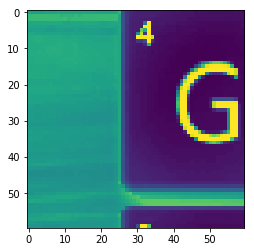

In [13]:
plt.imshow(tiles[2])
plt.show()

In [14]:
p.position()

(1093, 388)